# Text Module Example



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pvops.text import utils
import text_class_example


## Problem statements:

### 1. Text Preprocessing
Process the documents into concise, machine learning-ready documents. Additionally, extract dates from the text.

### 2. Text Classification
The written tickets are used to make an inference on the specified event descriptor.


## Text processing 

### Import text data

In [2]:
folder = 'example_data//'
filename = 'example_ML_ticket_data.csv'
df = pd.read_csv(folder+filename)
df.head(n=3)

,Date_EventStart,Date_EventEnd,Asset,CompletionDesc,Cause,ImpactLevel,randid
0,8/16/2018 9:00,8/22/2018 17:00,Combiner,cb 1.18 was found to have contactor issue woul...,0000 - Unknown.,Underperformance,38
1,9/17/2018 18:25,9/18/2018 9:50,Pad,self resolved. techdispatched: no,004 - Under voltage.,Underperformance,46
2,8/26/2019 9:00,11/5/2019 17:00,Facility,"all module rows washed, waiting for final repo...",0000 - Unknown,Underperformance,62


### Establish settings

Specify column names which will be used in this pipeline.

In [3]:
DATA_COLUMN = "CompletionDesc"   # Contains document
LABEL_COLUMN = "Asset"           # Establish event descriptor which will be inferenced by classifiers
DATE_COLUMN = 'Date_EventStart'  # Date of ticket (start date, end date; any reflective date will do), used in date extracting pipeline to replace information not specified in ticket

### Step 0: If needed, map raw labels to a cleaner set of labels

In [4]:
asset_remap_filename = 'remappings_asset.csv'
REMAPPING_COL_FROM = 'in'
REMAPPING_COL_TO = 'out_'
remapping_df = pd.read_csv(folder+asset_remap_filename)

In [5]:
remapping_col_dict = {
    'attribute_col': LABEL_COLUMN,
    'remapping_col_from': REMAPPING_COL_FROM,
    'remapping_col_to': REMAPPING_COL_TO
}

df_remapped_assets = utils.remap_attributes(df.iloc[30:].copy(), remapping_df.iloc[20:].copy(), remapping_col_dict, allow_missing_mappings=True)

df = df_remapped_assets

In [6]:
df[LABEL_COLUMN].value_counts()

inverter                  26
facility                  24
tracker                    6
combiner                   4
other                      2
substation                 2
transformer                1
ground-mount pv system     1
energy storage             1
energy meter               1
met station                1
pyranometer                1
Name: Asset, dtype: int64

### Step 1: Establish example instance and render preliminary information about the tickets

In [7]:
# Establish the class object (found in text_class_example.py)
print(df[LABEL_COLUMN].value_counts())

e = text_class_example.Example(df, LABEL_COLUMN)
e.summarize_text_data(DATA_COLUMN)

inverter                  26
facility                  24
tracker                    6
combiner                   4
other                      2
substation                 2
transformer                1
ground-mount pv system     1
energy storage             1
energy meter               1
met station                1
pyranometer                1
Name: Asset, dtype: int64
DETAILS
  70 samples
  0 invalid documents
  29.16 words per sample on average
  Number of unique words 881
  2041.00 total words


### Visualize timeseries of ticket publications

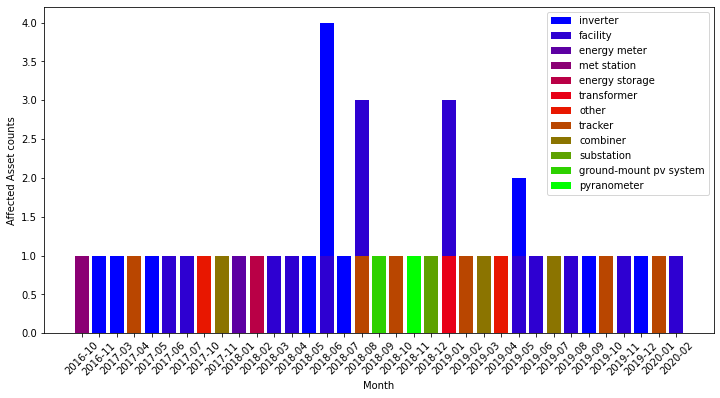

In [8]:
fig = e.visualize_attribute_timeseries(DATE_COLUMN)
plt.show()

### Functionality 1.1: Extract dates

In [9]:
# Extract date from ticket, if any. This framework is not 100% correct.
dates_df = e.extract_dates(DATA_COLUMN, DATE_COLUMN, SAVE_DATE_COLUMN='ExtractedDates')
dates_df

,CompletionDesc,ExtractedDates
0,8/39/19 inverter was faulted with lp15 (low pr...,[2019-08-17 07:35:00]
1,"11,july 2018 -upon arrival w-a6-2, inverter is...","[2018-07-11 18:55:00, 2018-06-02 18:55:00, 201..."
2,arrived site checked into c4. i was able to pi...,[2020-05-26 14:45:00]
3,c4 closed site remotely. techdispatched: no,[]
4,inspection troubleshooting malfunctioning trac...,[]
...,...,...
65,cleared cleared alert however psi is -3 invert...,[2016-11-03 09:28:00]
66,c4 closed remotely. techdispatched: no,[]
67,pure power fixed damaged source circuits did f...,"[2019-04-16 09:00:00, 2019-03-16 15:15:00]"
68,checked network connection to rm-1 didn't see ...,[]


### Functionality 1.2: Preprocess data for the Machine Learning classification

In [10]:
preprocessed_df = e.prep_data_for_ML(DATA_COLUMN, DATE_COLUMN)
preprocessed_df

,CompletionDesc,CleanDesc
0,inverter displayed ground fault. after resetti...,inverter displayed ground fault resetting brea...
1,closing wo. techdispatched: no,closing wo techdispatched
2,"10/2/19 e-1, row 51, e1-3-51-1. tracker tracki...",row tracker tracking wrong lubed gear boxes tr...
3,[no completion notes were entered servicemax]....,completion notes entered servicemax techdispat...
4,per j. 1/24: we changed tap settings all 42 tr...,per changed tap settings transformers evening ...
...,...,...
59,"west w-a5/w-b5, row 12-20, flat, this is being...",west w w b row flat worked reoccurring issue e...
60,inventory sub techdispatched: yes,inventory sub techdispatched yes
61,checked network connection to rm-1 didn't see ...,checked network connection n see issues activi...
62,investigate inverter down. inverter 3.5 had re...,investigate inverter inverter resumed operatio...


### Results of text processing

In [11]:
print("Pre-text processing")
e.summarize_text_data(DATA_COLUMN)

print("\nPost-text processing")
e.summarize_text_data('CleanDesc')

Pre-text processing
DETAILS
  64 samples
  0 invalid documents
  27.95 words per sample on average
  Number of unique words 778
  1789.00 total words

Post-text processing
DETAILS
  64 samples
  0 invalid documents
  17.31 words per sample on average
  Number of unique words 489
  1108.00 total words


### Visualizing entropy of clustering technique pre- and post- processing

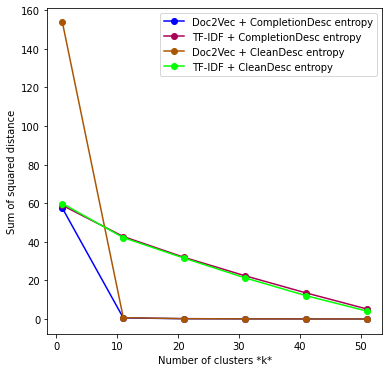

In [12]:
fig = e.visualize_cluster_entropy([DATA_COLUMN, 'CleanDesc'])
plt.show()

### Functionality 1.3: Frequency plot

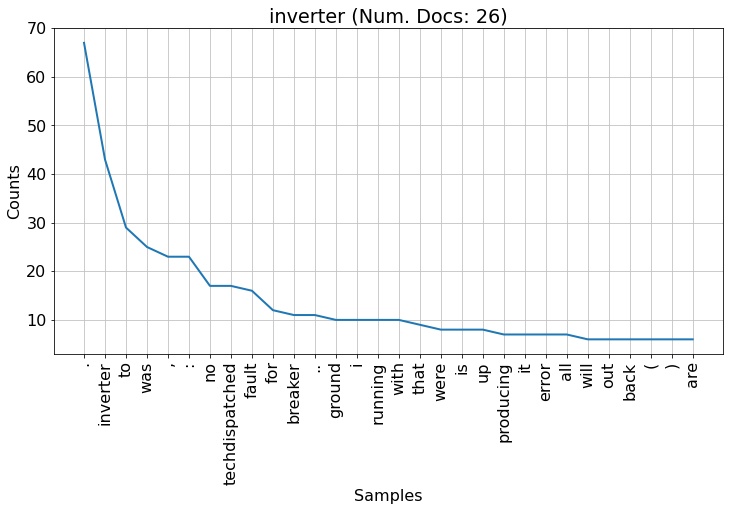

In [13]:
# Frequency plot on unprocessed data
fig = e.visualize_freqPlot(LBL_CAT='inverter', DATA_COLUMN=DATA_COLUMN)
plt.show()

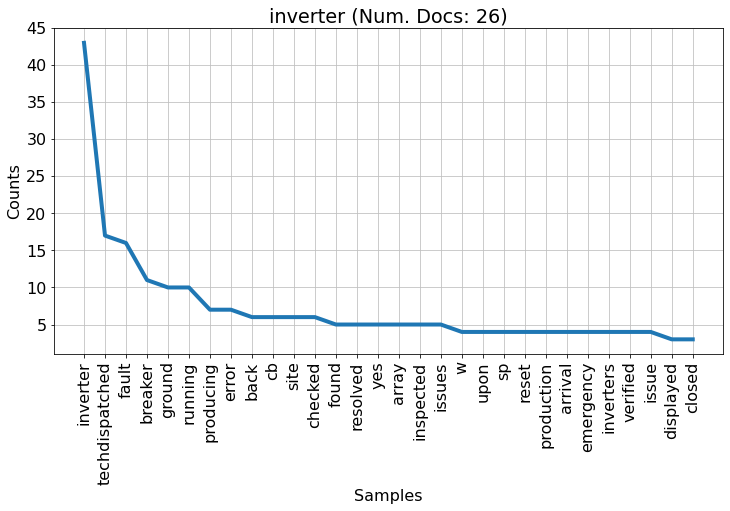

In [14]:
# Frequency plot on processed data
fig = e.visualize_freqPlot(LBL_CAT='inverter',
                            # Optional, kwargs into nltk's FreqDist
                            graph_aargs = {
                                'linewidth':4
                            }
                        )
plt.show()

### Hint: Use the below code to visualize frequency plots for all assets
    
    set_labels = list(set(e.df[e.LABEL_COLUMN].tolist()))
    for lbl in set_labels:
        fig = e.visualize_freqPlot(LBL_CAT=lbl)
        plt.show()

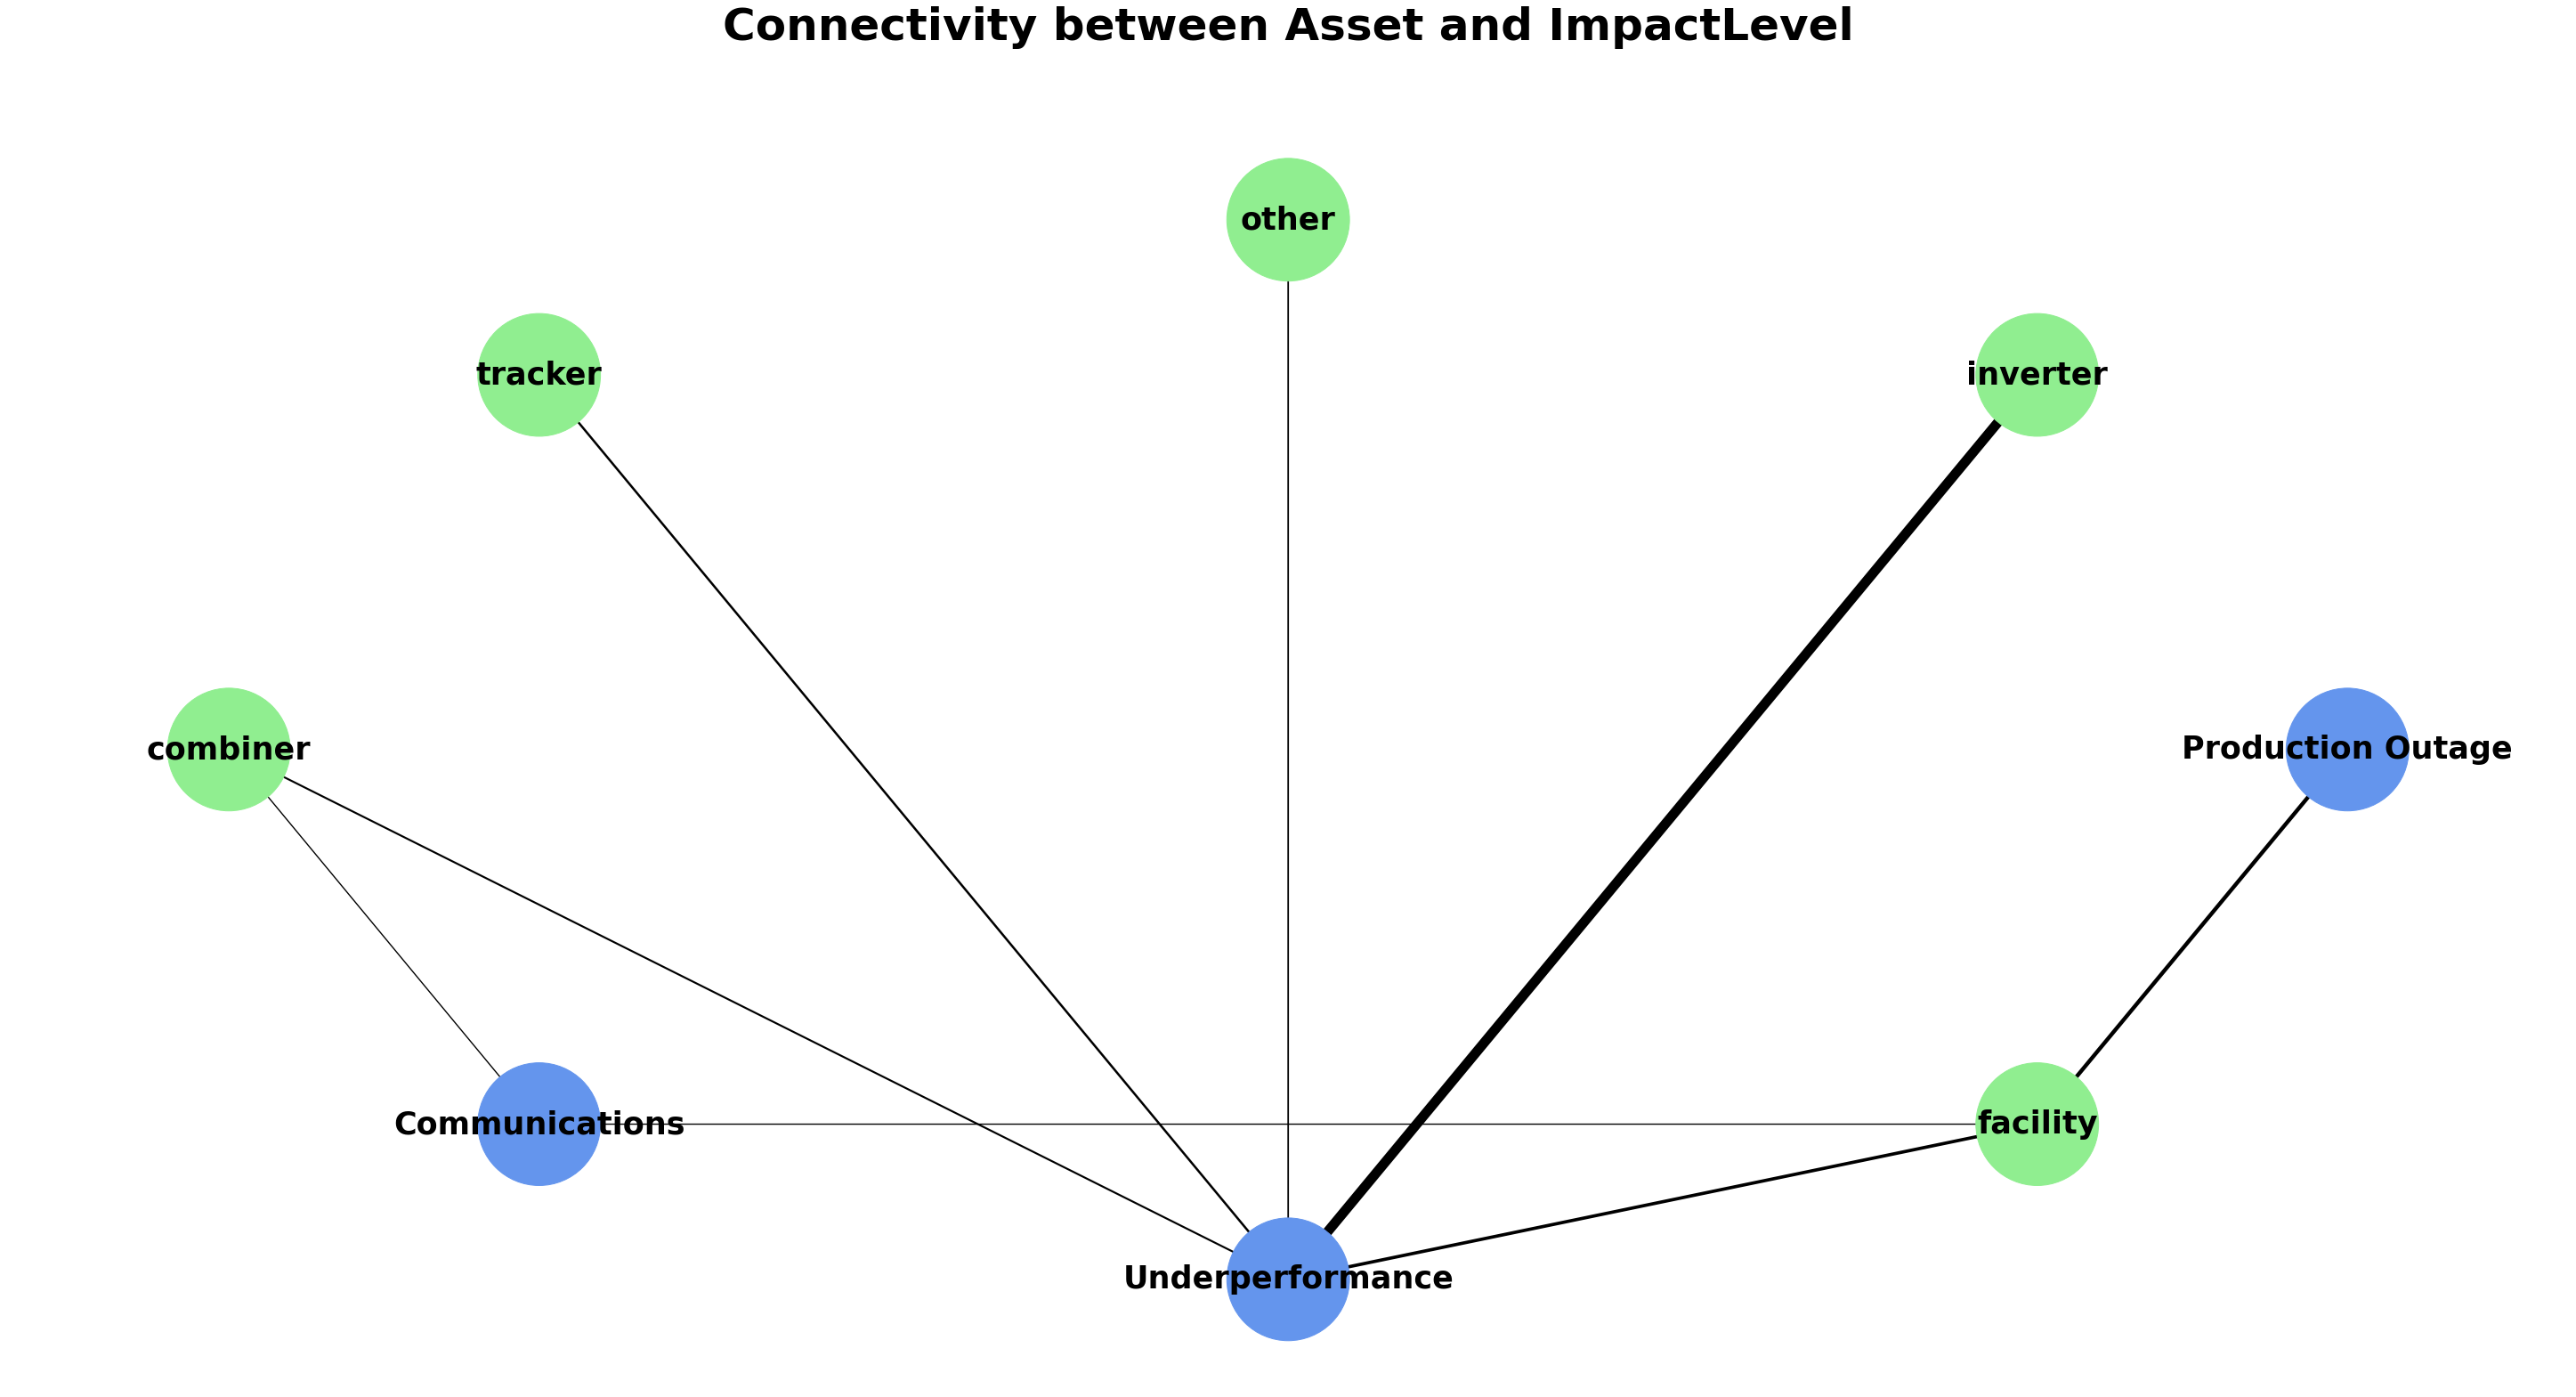

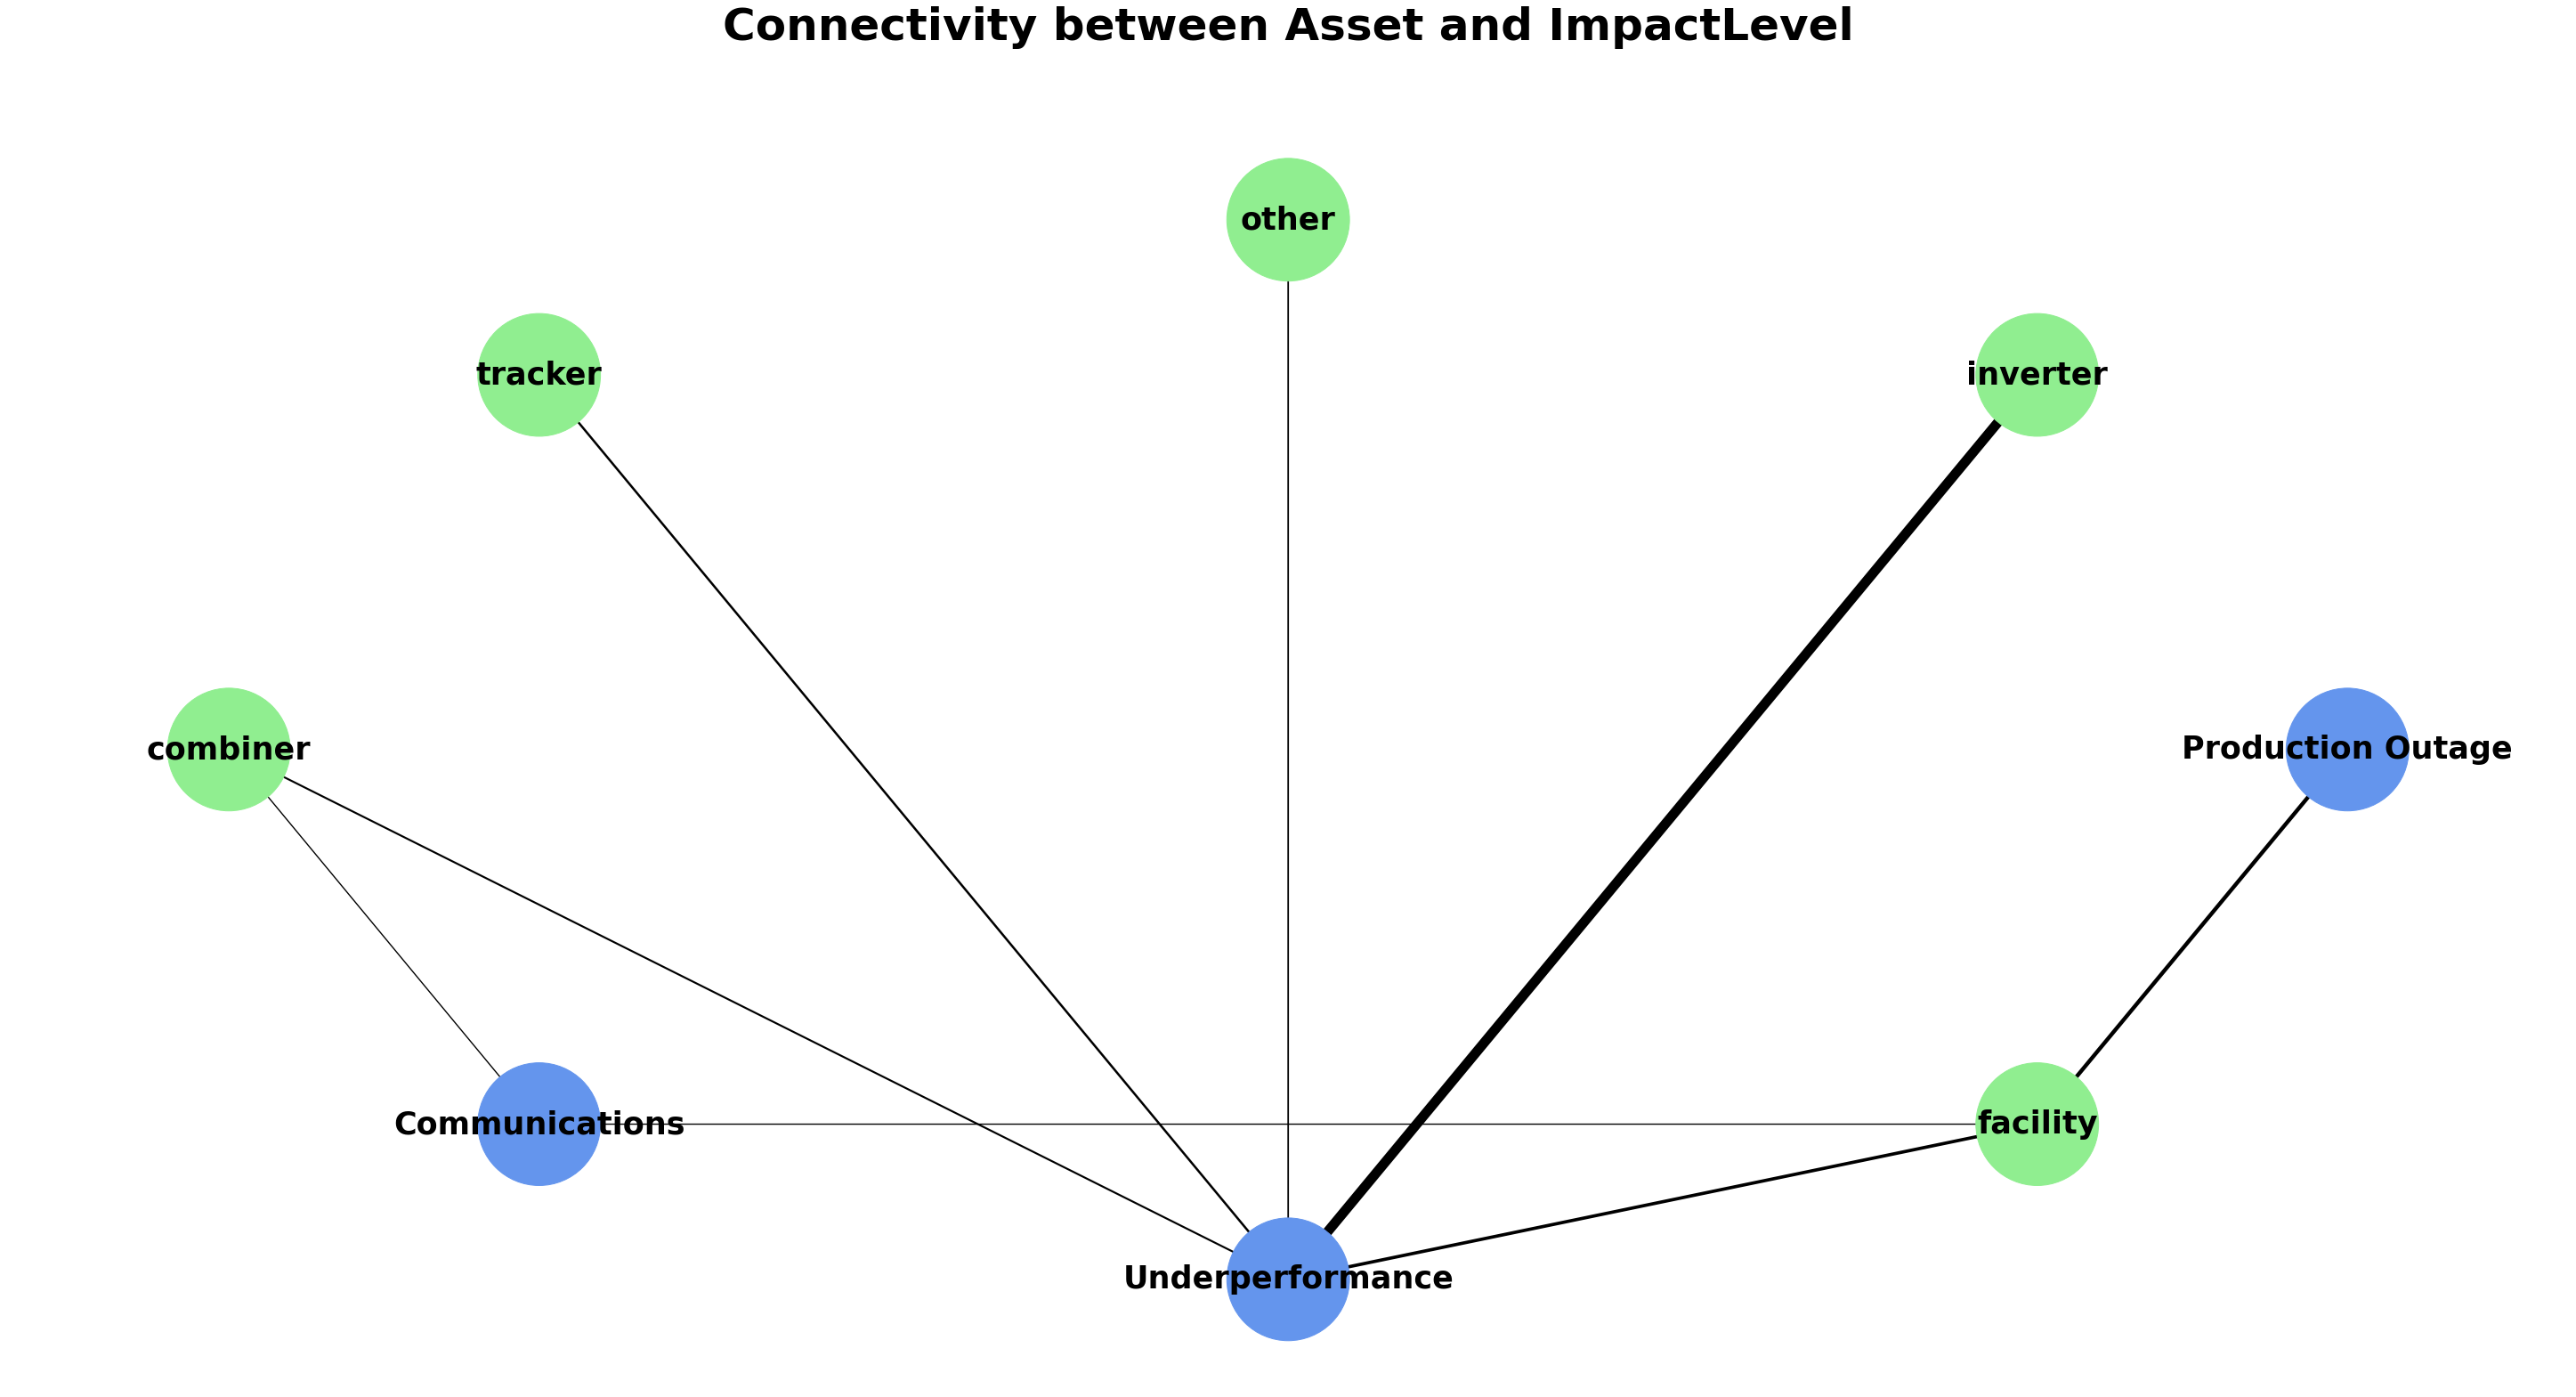

In [15]:
# Only supports two attributes
om_col_dict = {
    'attribute1_col': 'Asset',
    'attribute2_col': 'ImpactLevel'
}

fig,edges = e.visualize_attribute_connectivity(om_col_dict,
            # Optional
            graph_aargs = {'with_labels':True,
                            'font_weight':'bold',
                            'node_size':19000,
                            'font_size':35}
)
plt.show()

fig,edges = e.visualize_attribute_connectivity(om_col_dict,
            # Optional
            graph_aargs = {'with_labels':True,
                            'font_weight':'bold',
                            'node_size':19000,
                            'font_size':35}
    )
plt.show()

### Functionality 2.1: Conduct supervised classification on tickets using a cross-validated grid search

In [16]:
# Setting few cross validation splits because of few example data
results, best_model = e.classify_supervised(n_cv_splits=2, embedding='tfidf')
print('best_model', best_model)
results

Starting ML analysis with TF-IDF embeddings


/home/klbonne/.local/bin/anaconda3/envs/pvops_dev/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/klbonne/.local/bin/anaconda3/envs/pvops_dev/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


best_model Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 3))),
                ('clf',
                 AdaBoostClassifier(learning_rate=0.9, n_estimators=100))])


,estimator,min_score,mean_score,max_score,std_score,mean_fit_time,clf__C,clf__max_iter,tfidf__ngram_range,tfidf__stop_words,...,clf__alpha,clf__batch_size,clf__hidden_layer_sizes,clf__learning_rate,clf__solver,clf__loss,clf__normalize,clf__n_estimators,clf__max_samples,clf__algorithm
68,AdaBoostClassifier,0.405828,0.51077,0.615713,0.104943,0.490672,NaN,NaN,"(1, 3)",None,...,NaN,NaN,NaN,0.9,NaN,NaN,NaN,100,NaN,SAMME.R
67,AdaBoostClassifier,0.405828,0.50452,0.603213,0.098693,0.311991,NaN,NaN,"(1, 3)",None,...,NaN,NaN,NaN,0.9,NaN,NaN,NaN,50,NaN,SAMME.R
66,AdaBoostClassifier,0.405828,0.50452,0.603213,0.098693,0.505615,NaN,NaN,"(1, 3)",None,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,100,NaN,SAMME.R
65,AdaBoostClassifier,0.405828,0.50452,0.603213,0.098693,0.228535,NaN,NaN,"(1, 3)",None,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,50,NaN,SAMME.R
46,PassiveAggressiveClassifier,0.415693,0.496643,0.577592,0.08095,0.012681,1.0,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,NaN,squared_hinge,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,SGDClassifier,0.234722,0.266319,0.297917,0.031597,0.010377,NaN,NaN,"(1, 3)",None,...,0.001,NaN,NaN,NaN,NaN,squared_hinge,NaN,NaN,NaN,NaN
6,SVC,0.234722,0.234722,0.234722,0.0,0.010475,1.0,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,SVC,0.234722,0.234722,0.234722,0.0,0.009219,1.0,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,PassiveAggressiveClassifier,0.007353,0.007353,0.007353,0.0,0.012141,0.0,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,NaN,hinge,NaN,NaN,NaN,NaN


### Functionality 1.4: Conduct unsupervised clustering  on tickets using a cross-validated grid search

In [17]:
# Setting few cross validation splits because of few example data
results, best_model = e.classify_unsupervised(n_cv_splits=2, embedding='tfidf')
print('best_model', best_model)
results

Starting ML analysis with TF-IDF embeddings


/home/klbonne/.local/bin/anaconda3/envs/pvops_dev/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


best_model Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 3))),
                ('to_dense', DataDensifier()),
                ('clf', KMeans(n_clusters=6, n_init=50))])


,estimator,min_score,mean_score,max_score,std_score,mean_fit_time,clf__damping,clf__max_iter,tfidf__ngram_range,tfidf__stop_words,clf__branching_factor,clf__n_clusters,clf__threshold,clf__init,clf__n_init,clf__bandwidth,clf__bin_seeding
11,KMeans,0.313728,0.333799,0.353871,0.020072,0.186948,NaN,NaN,"(1, 3)",None,NaN,6,NaN,k-means++,50,NaN,NaN
4,Birch,0.276786,0.331021,0.385256,0.054235,0.189743,NaN,NaN,"(1, 3)",None,50,6,0.5,NaN,NaN,NaN,NaN
7,Birch,0.276786,0.331021,0.385256,0.054235,0.097206,NaN,NaN,"(1, 3)",None,100,6,0.5,NaN,NaN,NaN,NaN
3,AffinityPropagation,0.298178,0.309299,0.320421,0.011121,0.132939,0.9,600,"(1, 3)",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AffinityPropagation,0.287096,0.300471,0.313845,0.013374,0.039726,0.5,600,"(1, 3)",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AffinityPropagation,0.286696,0.298847,0.310998,0.012151,0.033967,0.9,200,"(1, 3)",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,KMeans,0.289914,0.293962,0.298011,0.004048,0.075647,NaN,NaN,"(1, 3)",None,NaN,6,NaN,random,50,NaN,NaN
15,KMeans,0.201309,0.274098,0.346888,0.07279,0.117776,NaN,NaN,"(1, 3)",None,NaN,6,NaN,random,100,NaN,NaN
12,KMeans,0.183041,0.272473,0.361905,0.089432,0.32514,NaN,NaN,"(1, 3)",None,NaN,6,NaN,k-means++,100,NaN,NaN
0,AffinityPropagation,0.256893,0.271995,0.287096,0.015102,0.025993,0.5,200,"(1, 3)",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
e.predict_best_model(ml_type = 'supervised')

Best algorithm found:
 Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 3))),
                ('clf',
                 AdaBoostClassifier(learning_rate=0.9, n_estimators=100))])
Predictions stored to Supervised_Pred_Asset in `df` attribute
Score: 0.6898437500000001


In [19]:
e.predict_best_model(ml_type = 'unsupervised')

Best algorithm found:
 Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 3))),
                ('to_dense', DataDensifier()),
                ('clf', KMeans(n_clusters=6, n_init=50))])
Predictions stored to Unsupervised_Pred_Asset in `df` attribute
Score: 0.18287669971531229


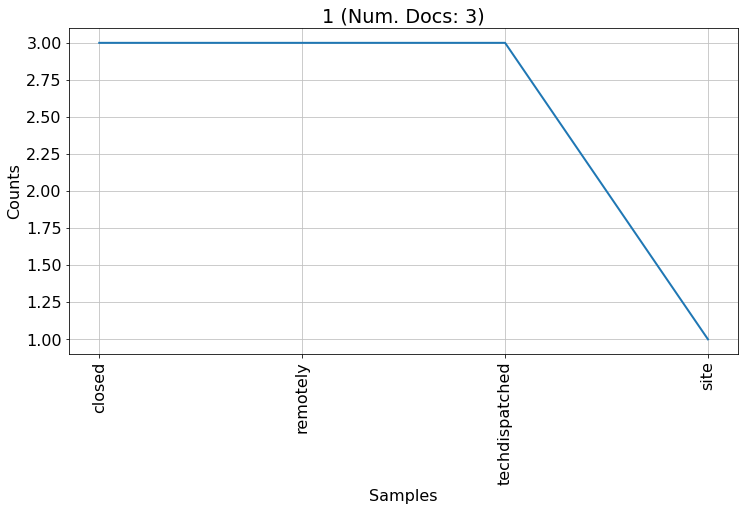

FreqDist({'closed': 3, 'remotely': 3, 'techdispatched': 3, 'site': 1})

In [20]:
e.LABEL_COLUMN = 'Unsupervised_Pred_Asset'
e.visualize_freqPlot(LBL_CAT = 1)

## Visualize Word Clusters

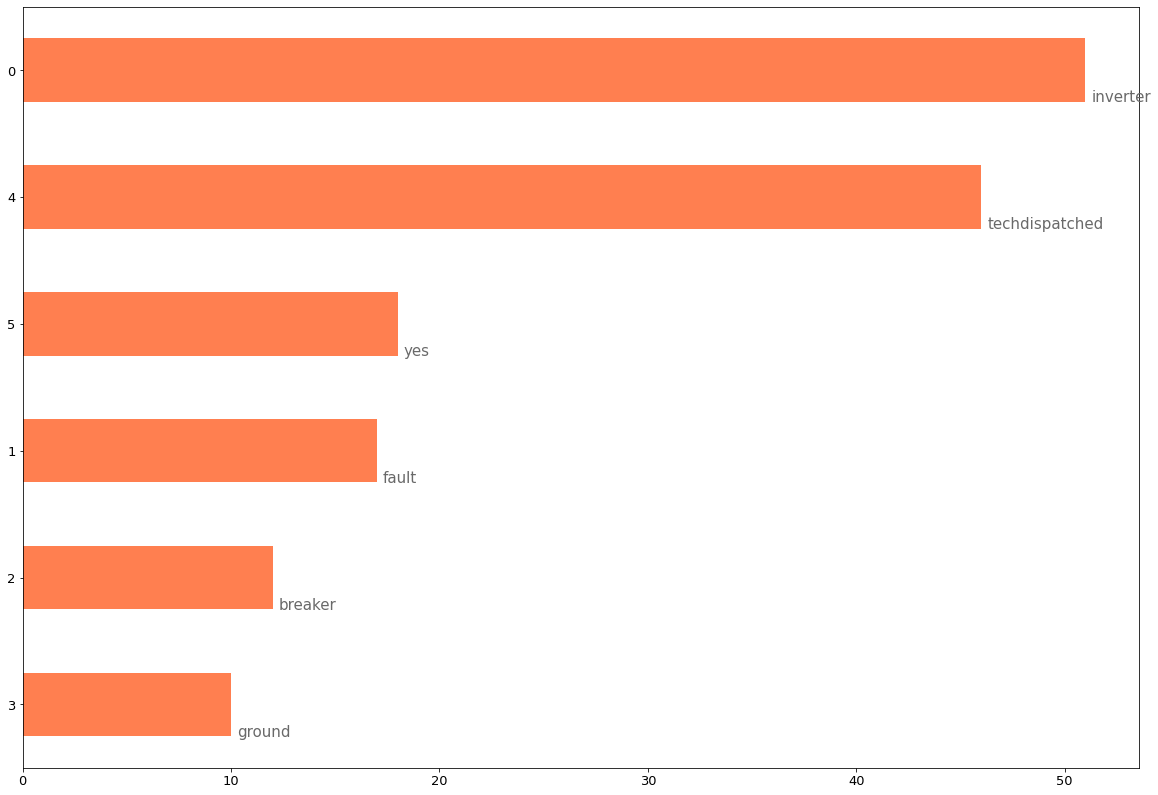

In [21]:
fig = e.visualize_document_clusters(min_frequency=10, DATA_COLUMN='CleanDesc')
plt.show()

Seeing the popularity of `techdispatched`, one might consider adding `techdispatched` to the stopwords list